# Modeling

##### Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from pydataset import data

from sklearn.cluster import KMeans

## Exercises

### 1. Clustering with the Iris Dataset

#### Using this lesson as a guide, perform clustering on the iris dataset.
* Choose features other than the ones used in the lesson.
* Visualize the results of your clustering
* Use the elbow method to visually select a good value for k.
* Repeat the clustering, this time with 3 different features.

In [2]:
df = data('iris')

In [3]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [7]:
X = df[['sepal_width', 'petal_width' ]]
X.head()

,sepal_width,petal_width
1,3.5,0.2
2,3.0,0.2
3,3.2,0.2
4,3.1,0.2
5,3.6,0.2


In [8]:
#Scale the X
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [9]:
X_scaled.head()

,sepal_width,petal_width
1,1.019004,-1.315444
2,-0.131979,-1.315444
3,0.328414,-1.315444
4,0.098217,-1.315444
5,1.249201,-1.315444


In [10]:
#define the thing
kmeans = KMeans(n_clusters=3)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int32)

In [11]:
# make a new column names cluster in iris and X_scaled dataframe

df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
146,6.7,3.0,5.2,2.3,virginica,1
147,6.3,2.5,5.0,1.9,virginica,0
148,6.5,3.0,5.2,2.0,virginica,1
149,6.2,3.4,5.4,2.3,virginica,1
150,5.9,3.0,5.1,1.8,virginica,1


In [12]:
# lets look at sample of 15 randomly selected rows in iris dataset
df.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
94,5.0,2.3,3.3,1.0,versicolor,0
106,7.6,3.0,6.6,2.1,virginica,1
107,4.9,2.5,4.5,1.7,virginica,0
31,4.8,3.1,1.6,0.2,setosa,2
133,6.4,2.8,5.6,2.2,virginica,1
136,7.7,3.0,6.1,2.3,virginica,1
116,6.4,3.2,5.3,2.3,virginica,1
67,5.6,3.0,4.5,1.5,versicolor,1
108,7.3,2.9,6.3,1.8,virginica,1
88,6.3,2.3,4.4,1.3,versicolor,0


Text(0.5, 1.0, 'Actual Species')

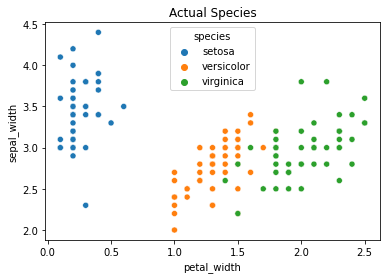

In [13]:
sns.scatterplot(data = df, x = 'petal_width', y = 'sepal_width', hue = 'species')
plt.title('Actual Species')

Text(0.5, 1.0, 'K-Means')

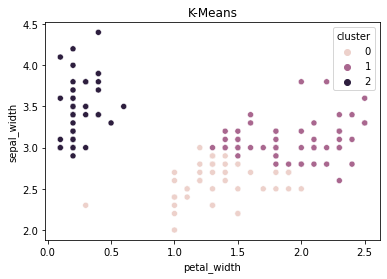

In [14]:
sns.scatterplot(data = df, x = 'petal_width', y = 'sepal_width', hue = 'cluster')
plt.title('K-Means') 

In [15]:
# Cluster Centers aka centroids. The output is scaled!!

kmeans.cluster_centers_

array([[-1.04776227,  0.18974112],
       [ 0.06891952,  0.96059584],
       [ 0.90625492, -1.25634413]])

In [16]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,sepal_width,petal_width
0,-1.047762,0.189741
1,0.068920,0.960596
2,0.906255,-1.256344


In [19]:
# Centriods for unscaled data?

centroids = df.groupby('cluster')['petal_width', 'sepal_width'].mean()
centroids

,petal_width,sepal_width
cluster,,
0,1.343478,2.602174
1,1.929091,3.087273
2,0.244898,3.451020


In [20]:

# Another way
# use inverse scaler to get cluster centers in original unscaled units
scaler.inverse_transform(kmeans.cluster_centers_)

array([[2.60217391, 1.34347826],
       [3.08727273, 1.92909091],
       [3.45102041, 0.24489796]])

In [21]:
# Labels (same as from predict)
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int32)

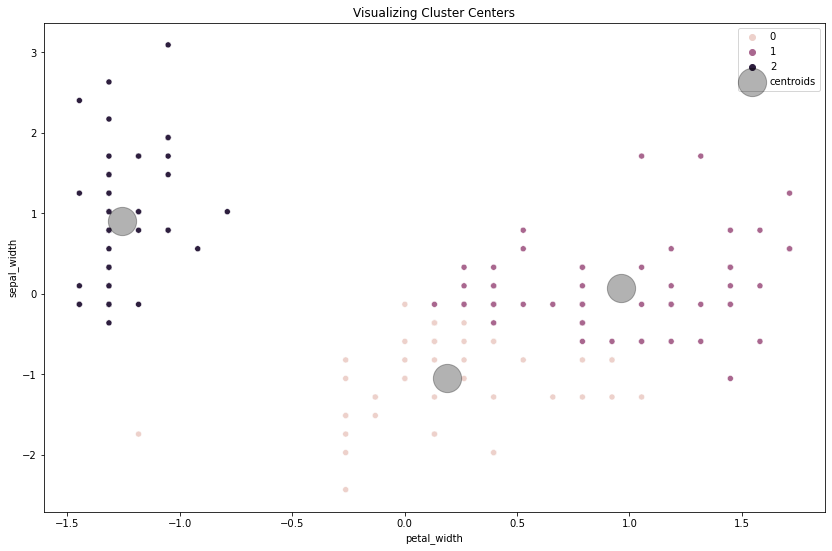

In [22]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y = 'sepal_width', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'petal_width', y = 'sepal_width', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [25]:
df['cluster'] = 'cluster_' + df.cluster.astype(str)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster_2
2,4.9,3.0,1.4,0.2,setosa,cluster_2
3,4.7,3.2,1.3,0.2,setosa,cluster_2
4,4.6,3.1,1.5,0.2,setosa,cluster_2
5,5.0,3.6,1.4,0.2,setosa,cluster_2


In [26]:
X_scaled['cluster'] = 'cluster_' + X_scaled.cluster.astype(str)

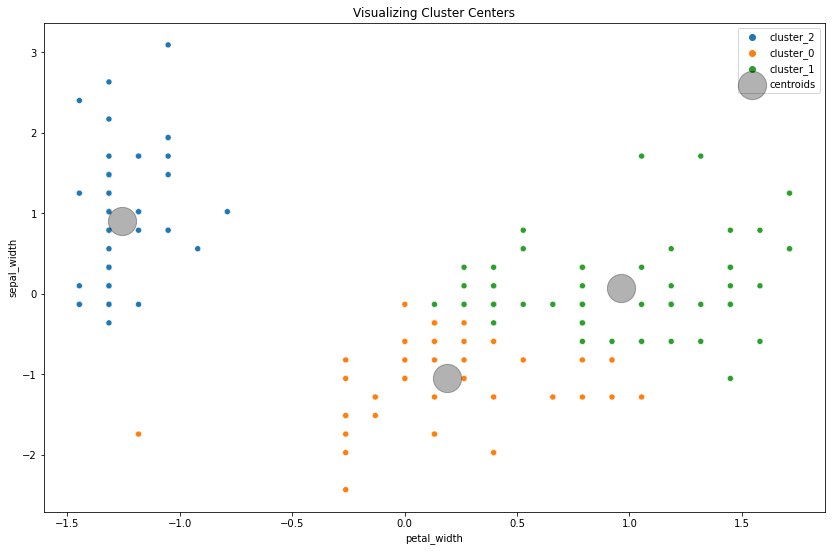

In [28]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y = 'sepal_width', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'petal_width', y = 'sepal_width', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [30]:
X = df[['petal_width', 'sepal_width']]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

<AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>

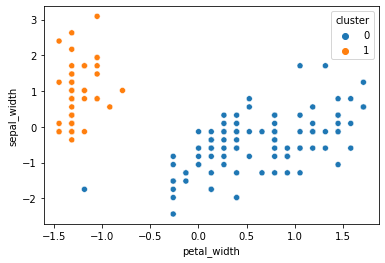

In [31]:
# lets look at two clusters (i.e k = 2)

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
sns.scatterplot(x='petal_width', y='sepal_width', data = X_scaled, hue = 'cluster')

In [32]:
kmeans.inertia_

125.36847212365322

In [33]:
X = df[['petal_width', 'sepal_width']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

125.36847212365322

In [34]:
k = 3

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

79.23480116760695

In [35]:
k = 4

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

59.70248988037297

In [36]:
k = 5

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

42.89791593689824

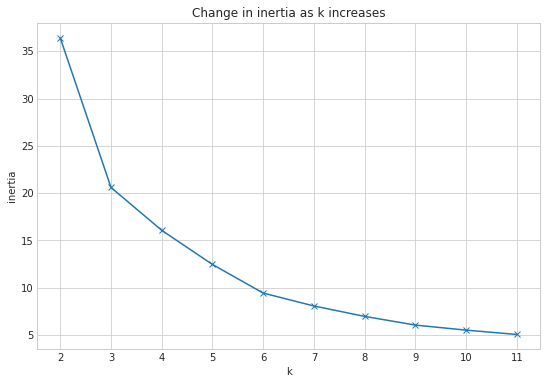

In [37]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

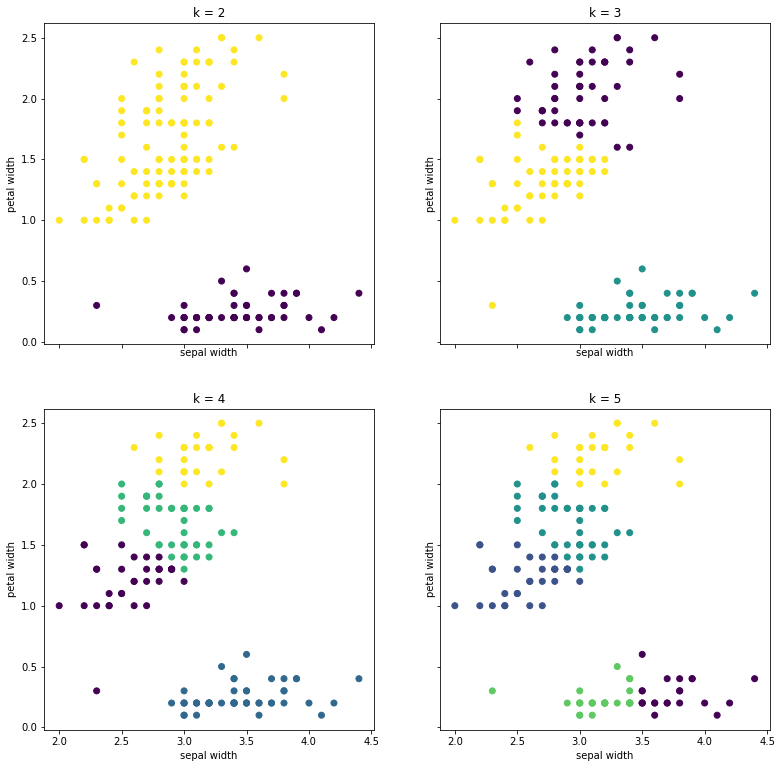

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal width', ylabel='petal width')

### 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [39]:
import pandas as pd
import env

def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

def get_mallcustomer_data():
    df = pd.read_sql('SELECT * FROM customers;', get_connection('mall_customers'))
    return df.set_index('customer_id')

In [41]:
df = get_mallcustomer_data()

In [42]:
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [43]:
#dummy for gender
df['is_male'] = pd.get_dummies(df['gender'], drop_first=True)['Male']
df.drop(columns=['gender'], inplace=True)
df.head()

,age,annual_income,spending_score,is_male
customer_id,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


In [47]:
from sklearn.model_selection import train_test_split

def split(df, target_var):
    '''
    This function takes in the dataframe and target variable name as arguments and then
    splits the dataframe into train (56%), validate (24%), & test (20%)
    It will return a list containing the following dataframes: train (for exploration), 
    X_train, X_validate, X_test, y_train, y_validate, y_test
    '''
    # split df into train_validate (80%) and test (20%)
    train_validate, test = train_test_split(df, test_size=.20, random_state=13)
    # split train_validate into train(70% of 80% = 56%) and validate (30% of 80% = 24%)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=13)

    # create X_train by dropping the target variable 
    X_train = train.drop(columns=[target_var])
    # create y_train by keeping only the target variable.
    y_train = train[[target_var]]

    # create X_validate by dropping the target variable 
    X_validate = validate.drop(columns=[target_var])
    # create y_validate by keeping only the target variable.
    y_validate = validate[[target_var]]

    # create X_test by dropping the target variable 
    X_test = test.drop(columns=[target_var])
    # create y_test by keeping only the target variable.
    y_test = test[[target_var]]
    
    print("train observations: ", train.size)
    print("validate observations: ", validate.size)
    print("test observations: ", test.size)
    
    partitions = [train, X_train, X_validate, X_test, y_train, y_validate, y_test]
    
    return partitions



In [48]:
partitions = split(df, target_var='spending_score')

train observations:  448
validate observations:  192
test observations:  160


In [49]:
# define independent variables for k-means

X = df[['age', 'annual_income']]
X.head(3)

,age,annual_income
customer_id,,
1,19,15
2,21,15
3,20,16


In [50]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [51]:
X_scaled.head()

,age,annual_income
1,-1.424569,-1.738999
2,-1.281035,-1.738999
3,-1.352802,-1.700830
4,-1.137502,-1.700830
5,-0.563369,-1.662660


In [52]:
#define the thing
kmeans = KMeans(n_clusters=3)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 0, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [55]:
# make a new column names cluster in mall df and X_scaled dataframe

df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)



ValueError: Incorrect number of features. Got 3 features, expected 2.

In [56]:
df.tail()

,age,annual_income,spending_score,is_male,cluster
customer_id,,,,,
196,35,120,79,0,0
197,45,126,28,0,0
198,32,126,74,1,0
199,32,137,18,1,0
200,30,137,83,1,0


In [57]:
# lets look at sample of 15 randomly selected rows in iris dataset
df.sample(15)


,age,annual_income,spending_score,is_male,cluster
customer_id,,,,,
86,48,54,46,1,2
121,27,67,56,1,0
115,18,65,48,0,1
101,23,62,41,0,1
26,29,28,82,1,1
129,59,71,11,1,2
111,65,63,52,1,2
161,56,79,35,0,2
68,68,48,48,0,2


In [58]:
# Cluster Centers aka centroids. The output is scaled!!

kmeans.cluster_centers_

array([[-0.27913465,  0.96851913],
       [-0.87474334, -0.83093616],
       [ 1.2169084 , -0.35628084]])

In [59]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,age,annual_income
0,-0.279135,0.968519
1,-0.874743,-0.830936
2,1.216908,-0.356281


In [60]:
# Centriods for unscaled data?

centroids = df.groupby('cluster')['age', 'annual_income'].mean()
centroids

,age,annual_income
cluster,,
0,34.960526,85.934211
1,26.661290,38.790323
2,55.806452,51.225806


In [61]:
# Another way to get the unscaled data
# use inverse scaler to get cluster centers in original unscaled units
scaler.inverse_transform(kmeans.cluster_centers_)

array([[34.96052632, 85.93421053],
       [26.66129032, 38.79032258],
       [55.80645161, 51.22580645]])

In [62]:
# Labels (same as from predict)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 0, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

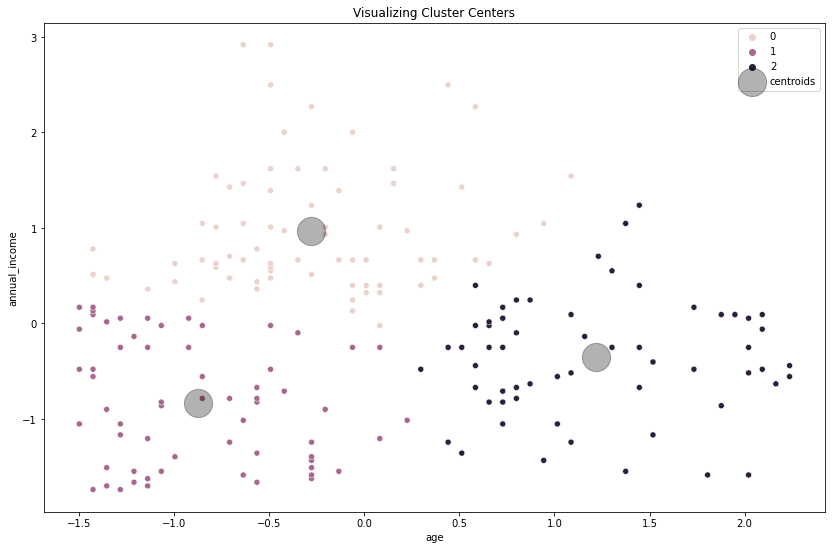

In [63]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'age', y = 'annual_income', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'age', y = 'annual_income', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [64]:
df['cluster'] = 'cluster_' + df.cluster.astype(str)
df.head()

,age,annual_income,spending_score,is_male,cluster
customer_id,,,,,
1,19,15,39,1,cluster_1
2,21,15,81,1,cluster_1
3,20,16,6,0,cluster_1
4,23,16,77,0,cluster_1
5,31,17,40,0,cluster_1


In [65]:
X_scaled['cluster'] = 'cluster_' + X_scaled.cluster.astype(str)


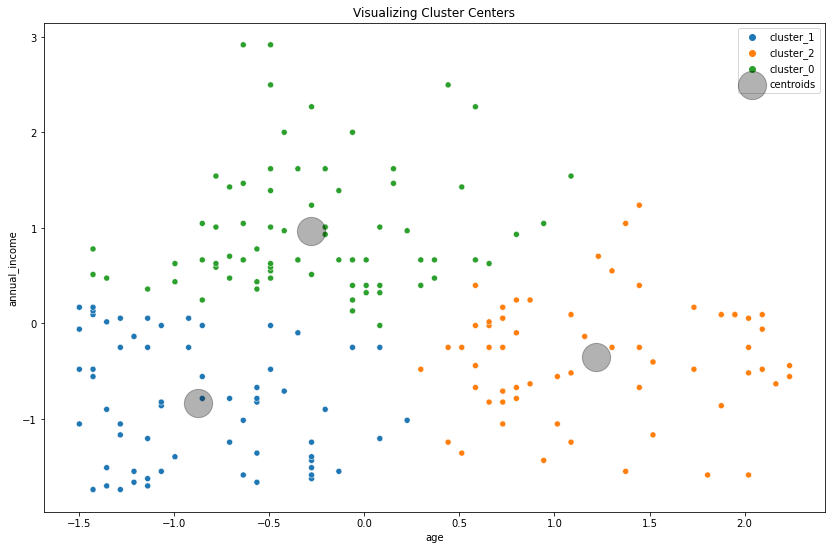

In [66]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'age', y = 'annual_income', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'age', y = 'annual_income', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [67]:
X = df[['age', 'annual_income']]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

<AxesSubplot:xlabel='age', ylabel='annual_income'>

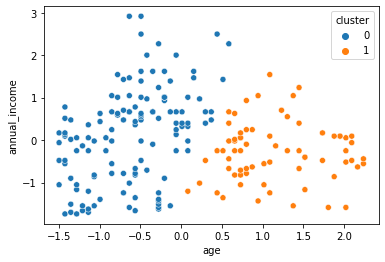

In [68]:
# lets look at two clusters (i.e k = 2)

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
sns.scatterplot(x='age', y='annual_income', data = X_scaled, hue = 'cluster')

In [69]:
kmeans.inertia_


250.58811570754705

In [70]:
X = df[['age', 'annual_income']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

250.58811570754705

In [71]:
k = 3

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

132.8553042122192

In [72]:
k = 4

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_


103.05151849277247

In [73]:
k = 5

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

81.40819144310572

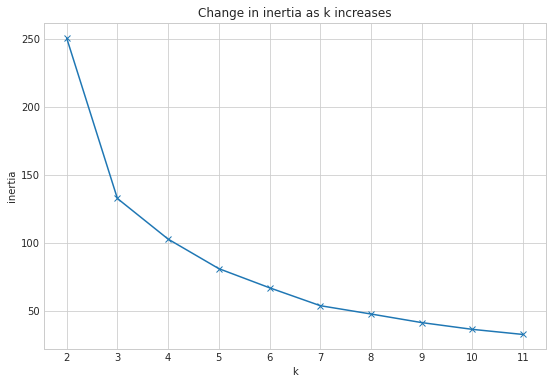

In [74]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

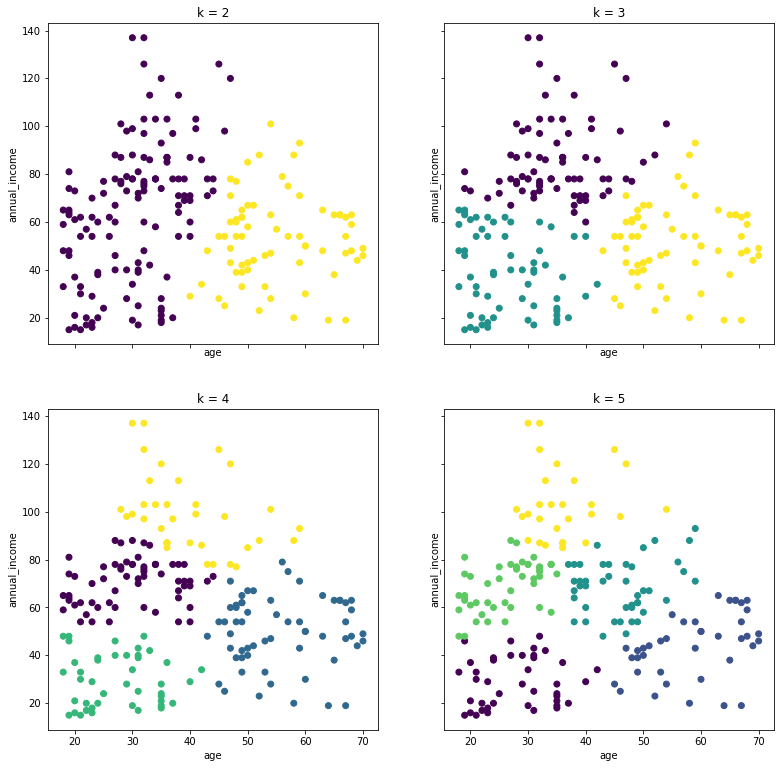

In [76]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.age, X.annual_income, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='age', ylabel='annual_income')

### 3. How does scaling impact the results of clustering?

#### Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.